#Tehreem Qasim https://www.linkedin.com/in/tehreem-qasim/

In [68]:
import pandas as pd
df = pd.read_csv("/kaggle/input/student-exam-performance-prediction/student_exam_data.csv")

In [69]:
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [71]:
target_column = 'Pass/Fail'

# Features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


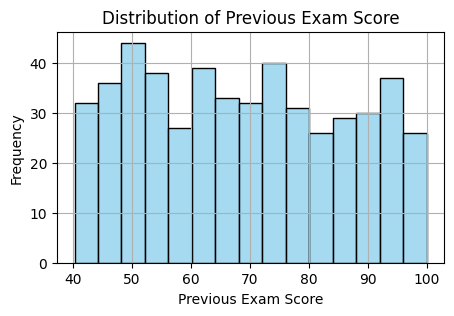

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 3))
sns.histplot(X['Previous Exam Score'], kde=False, color='skyblue', bins=15)
plt.title('Distribution of Previous Exam Score')
plt.xlabel('Previous Exam Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


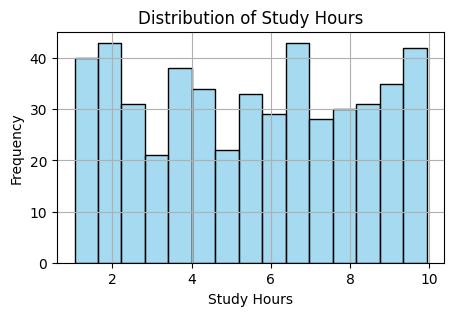

In [73]:
plt.figure(figsize=(5, 3))
sns.histplot(X['Study Hours'], kde=False, color='skyblue', bins=15)
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

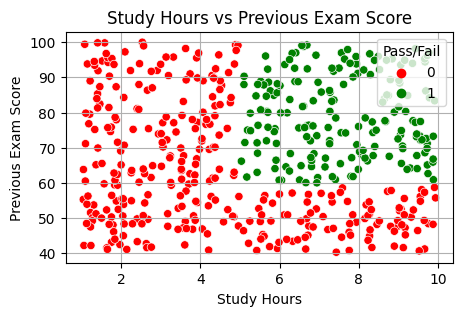

In [74]:
#Plot of study hours vs previous exam score w.r.t Pass/Fail
plt.figure(figsize=(5, 3))
sns.scatterplot(
    data=X,
    x='Study Hours', #x axis
    y='Previous Exam Score', # y axis
    hue=y, #'Pass/Fail'  #this is target variable y
    palette={0: 'red', 1: 'green'}
)
plt.title('Study Hours vs Previous Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')
plt.grid(True)
plt.show()

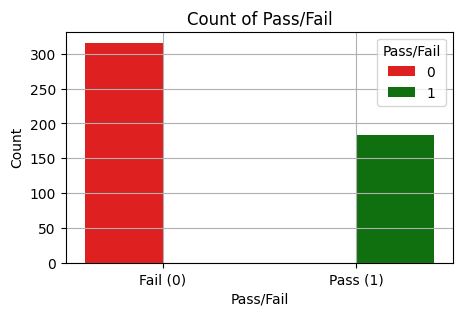

In [75]:
#Count plot of y
plt.figure(figsize=(5, 3))
sns.countplot(x=y,hue = y, palette={0: 'red', 1: 'green'})
plt.title('Count of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fail (0)', 'Pass (1)'])
plt.grid(True)
plt.show()

In [76]:
# There is a bit of a class imbalance...lets fix this with smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

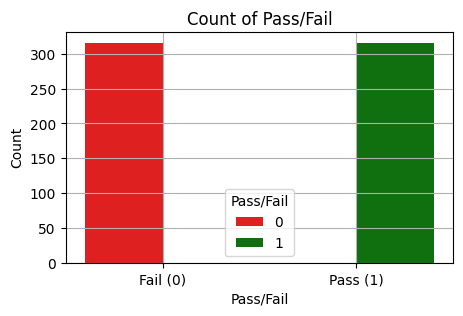

In [77]:
# Doing the count plots again
#Count plot of y
plt.figure(figsize=(5, 3))
sns.countplot(x=y,hue=y, palette={0: 'red', 1: 'green'})
plt.title('Count of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fail (0)', 'Pass (1)'])
plt.grid(True)
plt.show()

In [78]:
# Class imbalance has now been taken care of
#Standardizing the data before implementing the classifiers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X = pd.DataFrame(X_standardized, columns=X.columns)
X.head()

,Study Hours,Previous Exam Score
0,-0.595896,0.684534
1,1.393301,0.089164
2,0.638186,-0.743169
3,0.177856,1.109329
4,-1.350324,0.635195


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


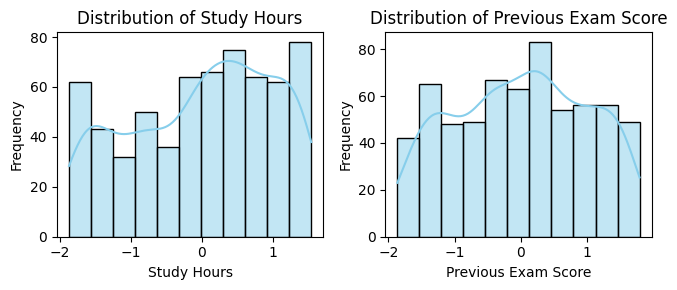

In [79]:
#Plotting historgeams of each column after standardization

num_cols = X.shape[1]

# Creating subplots for each column
plt.figure(figsize=(10, 3 * (num_cols // 3 + 1)))
for i, col in enumerate(X.columns):
    plt.subplot((num_cols // 3 + 1), 3, i + 1)
    sns.histplot(X[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()

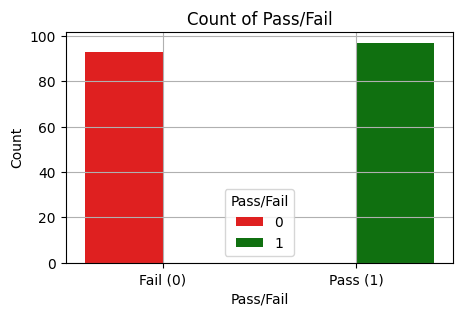

In [80]:
#Implementing the classifiers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Count plot of y_test
plt.figure(figsize=(5, 3))
sns.countplot(x=y_test, hue=y_test, palette={0: 'red', 1: 'green'})
plt.title('Count of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Fail (0)', 'Pass (1)'])
plt.grid(True)
plt.show()

#We see below that the test data is now more or lass balanced.

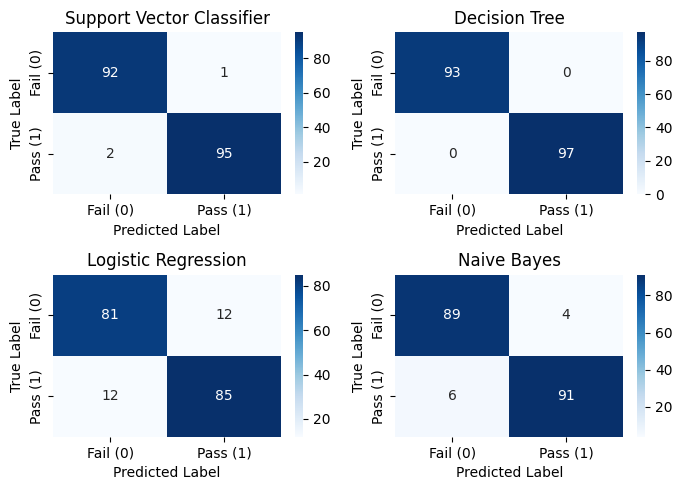

 
 
--------------------------------------------------


,Accuracy,Precision,Recall
Support Vector Classifier,0.984211,0.984268,0.984211
Decision Tree,1.000000,1.000000,1.000000
Logistic Regression,0.873684,0.873684,0.873684
Naive Bayes,0.947368,0.947590,0.947368


In [81]:

svc = SVC()
decision_tree = DecisionTreeClassifier()
logistic_regression = LogisticRegression()
naive_bayes = GaussianNB()
results = {}


# Dictionary to store classifiers
classifiers = {
    'Support Vector Classifier': svc,
    'Decision Tree': decision_tree,
    'Logistic Regression': logistic_regression,
    'Naive Bayes': naive_bayes
}

# Creating a figure with subplots for confusion matrices
plt.figure(figsize=(7, 5))

# Training and evaluating each classifier
for i, (name, clf) in enumerate(classifiers.items(), 1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Computing confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting confusion matrix
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail (0)', 'Pass (1)'], yticklabels=['Fail (0)', 'Pass (1)'])
    plt.title(name)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    #Computing Accuracy, Precision and Recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

plt.tight_layout()
plt.show()


print(" ")
print(" ")
print("--------------------------------------------------")

results_df = pd.DataFrame(results).T
results_df
